In [213]:
import wnutils as wx
import numpy as np
import matplotlib.pyplot as plt

Define a function to calculate the reaction energy. $Q = \Delta_{r1} + \Delta_{r2} - \Delta_{p1} - \Delta_{p2}$, where $\Delta$ is the mass excess of a nucleus; r means reactant and p stands for product. When the Q_value is ready, we also need to define a function to plot the Q values. So function plot_Q takes inputs (data, min value of color bar, max value of color bar) to plot a color map showing the reaction energy. 

In [214]:
def get_Q_values(xml_file, reac_xpath):
    xml = wx. Xml(f'{xml_file}')
    nuclides = xml.get_nuclide_data()
    reactions = xml.get_reaction_data(reac_xpath)

    Q_values = {}
    No_mass = ['gamma', 'electron', 'positron', 'anti-neutrino_e', 'neutrino_e']
    for r in reactions:
        rea = reactions[r].reactants
        pro = reactions[r].products
        Eb = 0
        for i in range(len(rea)):
            if rea[i] in No_mass:
                continue
            if rea[i] in nuclides:
                z = nuclides[rea[i]]['z']
                a = nuclides[rea[i]]['a']
            else:
                continue
            Eb = Eb + nuclides[rea[i]]["mass excess"]
        for i in range(len(pro)):
            if pro[i] in No_mass:
                continue
            if pro[i] not in nuclides:
                continue
            Eb = Eb - nuclides[pro[i]]["mass excess"]
        Q_values[z, a] = [Eb, r]
        #create a matrix that includes all the Q_values, z, and n.
    Q_chart = np.zeros((200, 300))
    for (z, a) in sorted(Q_values.keys()):
        n = a-z
        Q_chart[z, n] = Q_values[z, a][0]
    return Q_values, Q_chart

def plot_Q(data, cmin, cmax):
    masked = np.ma.masked_where(data==0, data)
    plt.imshow(masked, origin = 'lower', cmap=plt.cm.jet)
    plt.colorbar(label="Q values (MeV)", orientation="vertical", shrink=0.7)
    plt.xlim(0, 230)
    plt.ylim(0, 130)
    plt.title(title)
    plt.xlabel('Neutron Number: N')
    plt.ylabel('Proton Number: Z')
    plt.clim(cmin, cmax)
    plt.tight_layout()

If we would like to plot the neutron separation energy, we need to select this reaction path. For $(n, \gamma)- (\gamma, n)$ reactions, the reactants are a neutron and a seed nuclues. So the raactant = 'n' and the count(reactant) = 2. The product includes a $\gamma$, so we use product = 'gamma' to select this kind reactions. Here, the data source is from Dr. Meyer's nuclear reaction data base ('my_net.xml').

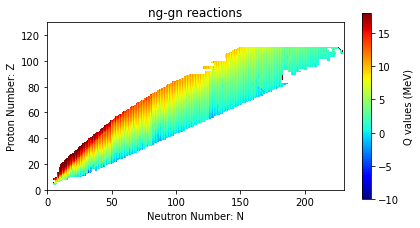

In [215]:
reac_xpath = "[reactant = 'n' and count(reactant) = 2 and product = 'gamma']"
Q_values, Q_chart = get_Q_values('my_net.xml', reac_xpath)
title = 'ng-gn reactions'
plot_Q(Q_chart, -10, 18)


Since the reaction energy is affected by the masses (mass excess) of the nuclei, if the mass of the nuclues is changed, the reaction energy will also be affected. So, here, when we use the mass from a Machine Learning model, the corresonding reaction energy will also change. This new data is in 'my_net_mean1,xml'. We only need to change the input xml file to this new data file, we can plot the Q values.

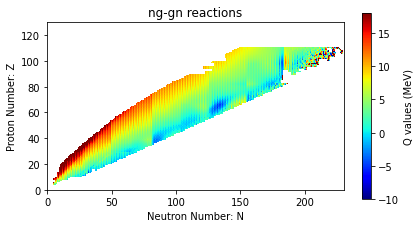

In [216]:
Q_values1, Q_chart1 = get_Q_values('my_net_mean1.xml', reac_xpath)
masked = np.ma.masked_where(Q_chart1==0, Q_chart)
plot_Q(Q_chart1, -10, 18)


If we would like to compare the Q valies difference between the first mass model and the machine learned model, we can plot the difference as well.

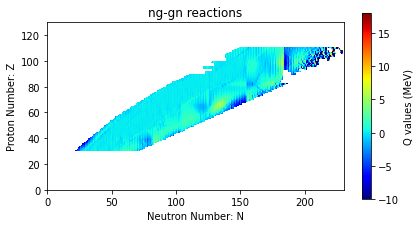

In [217]:
diff = Q_chart - Q_chart1 
plot_Q(diff, -10, 18)

 Since $\delta_Q$ will be smaller than $Q$, we can chenge the min and max values of the color bar to make the difference more readable.

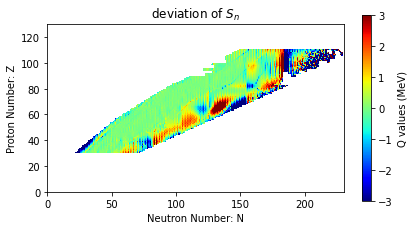

In [218]:
diff = Q_chart - Q_chart1 
title = 'deviation of $S_n$'
plot_Q(diff, -3, 3)

Now, if we are interested in the $\beta^-$ energy, we can use a different reaction path to select this reactions from 'my_net.xml'.

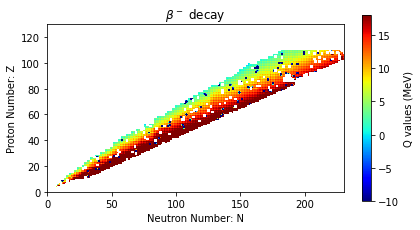

In [219]:
reac_xpath = "[count(reactant) = 1 and product = 'electron' and 'anti-neutrino_e' and not (product = 'n')]"
title = r'$\beta^-$ decay'
Q_values, Q_chart = get_Q_values('my_net.xml', reac_xpath)
plot_Q(Q_chart, -10,18)


Similarly, we can calculate the $Q_{\beta}$ value using the new mass data.

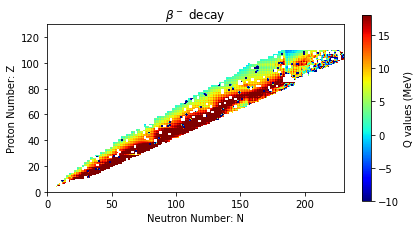

In [220]:
reac_xpath = "[count(reactant) = 1 and product = 'electron' and 'anti-neutrino_e' and not (product = 'n')]"
title = r'$\beta^-$ decay'
Q_values1, Q_chart1 = get_Q_values('my_net_mean1.xml', reac_xpath)
plot_Q(Q_chart1, -10, 18)

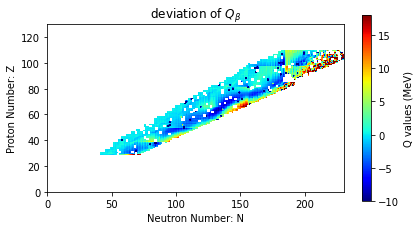

In [221]:
title = r'deviation of $Q_{\beta}$'
diff = Q_chart - Q_chart1
plot_Q(diff, -10, 18)